# Análisis del Conjunto de Datos de Precios de Aguacate

**Conjunto de Datos de Precios de Aguacate**: El conjunto de datos "Precios de Aguacate", obtenido de Kaggle, es un conjunto de datos ampliamente utilizado para proyectos de análisis de datos y aprendizaje automático. Proporciona datos históricos sobre precios y ventas de aguacates en varias regiones de los Estados Unidos. Este conjunto de datos es valioso para entender las tendencias en los precios de los aguacates, los volúmenes de ventas y su relación con diferentes factores.

## Atributos Clave

- **Columnas**: El conjunto de datos incluye varias columnas de información. Algunas de las columnas clave típicamente encontradas en este conjunto de datos incluyen:
    - **Fecha** (`Date`): La fecha de observación.
    - **Precio Promedio** (`AveragePrice`): El precio promedio de los aguacates.
    - **Volumen Total** (`Total Volume`): El volumen total de aguacates vendidos.
    - **4046**: Volumen de aguacates Hass pequeños vendidos.
    - **4225**: Volumen de aguacates Hass grandes vendidos.
    - **4770**: Volumen de aguacates Hass extra grandes vendidos.
    - **Bolsas Totales** (`Total Bags`): Total de bolsas de aguacates vendidas.
    - **Bolsas Pequeñas** (`Small Bags`): Bolsas de aguacates pequeños vendidas.
    - **Bolsas Grandes** (`Large Bags`): Bolsas de aguacates grandes vendidas.
    - **Bolsas Extra Grandes** (`XLarge Bags`): Bolsas de aguacates extra grandes vendidas.
    - **Tipo** (`Type`): El tipo de aguacates, generalmente categorizados como convencionales u orgánicos.
    - **Región** (`Region`): La región o ciudad dentro de los Estados Unidos donde se registraron los datos.

- **Rango de Fechas**: El conjunto de datos abarca un rango de fechas, lo que permite el análisis de series de tiempo. Puedes examinar cómo cambian los precios y ventas de aguacates a lo largo de diferentes estaciones y años.

- **Regiones**: Se proporciona información para varias regiones o ciudades a través de los Estados Unidos, lo que permite el análisis de variaciones de precios y ventas en diferentes mercados.

- **Tipos**: El conjunto de datos distingue entre diferentes tipos de aguacates, como convencionales y orgánicos, lo que puede ser útil para comparar tendencias de precios entre estas categorías.

- **Volumen**: Están disponibles datos sobre el volumen total de aguacates vendidos. Esta métrica de volumen se utiliza a menudo para analizar la demanda del mercado.

- **Precio Promedio**: El conjunto de datos contiene el precio promedio de los aguacates, una métrica fundamental para entender las tendencias de precios.

## Casos de Uso

- Este conjunto de datos se utiliza comúnmente para aprender y practicar el análisis de datos, visualización de datos y modelado de regresión en proyectos de ciencia de datos y aprendizaje automático.

- Sirve como un recurso valioso para entender cómo trabajar con datos del mundo real, extraer conocimientos y tomar decisiones basadas en datos.

---

## Actividades de Análisis

### 1. **Análisis de Series Temporales**
**Resumen:** El análisis de series temporales permite identificar patrones, tendencias y estacionalidades en los precios y volúmenes de ventas de aguacates a lo largo del tiempo.


In [2]:
!pip install pandas seaborn matplotlib statsmodels numpy
import numpy as np
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt
import statsmodels.api as sm


  Using cached statsmodels-0.14.4-cp312-cp312-manylinux_2_17_x86_64.manylinux2014_x86_64.whl.metadata (9.2 kB)
  Using cached patsy-0.5.6-py2.py3-none-any.whl.metadata (3.5 kB)
Using cached statsmodels-0.14.4-cp312-cp312-manylinux_2_17_x86_64.manylinux2014_x86_64.whl (10.7 MB)
Using cached patsy-0.5.6-py2.py3-none-any.whl (233 kB)


In [3]:
# Carga el conjunto de datos de aguacates
avocado = pd.read_csv("avocado.csv")

avocado.head()

,Unnamed: 0,Date,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region
0,0,2015-12-27,1.33,64236.62,1036.74,54454.85,48.16,8696.87,8603.62,93.25,0.0,conventional,2015,Albany
1,1,2015-12-20,1.35,54876.98,674.28,44638.81,58.33,9505.56,9408.07,97.49,0.0,conventional,2015,Albany
2,2,2015-12-13,0.93,118220.22,794.70,109149.67,130.50,8145.35,8042.21,103.14,0.0,conventional,2015,Albany
3,3,2015-12-06,1.08,78992.15,1132.00,71976.41,72.58,5811.16,5677.40,133.76,0.0,conventional,2015,Albany
4,4,2015-11-29,1.28,51039.60,941.48,43838.39,75.78,6183.95,5986.26,197.69,0.0,conventional,2015,Albany



1. **Descomposición de Series Temporales de Precios:** 
   - **Uso de Datos:** Usa la columna `AveragePrice` y `Date`.
   - **Esperado:** Utiliza la función `seasonal_decompose` de la librería `statsmodels` para descomponer la serie temporal de precios en componentes de tendencia, estacionalidad y ruido. 
     - Convierte `Date` a tipo datetime usando `pd.to_datetime()`.
     - Agrupa los datos por `Date` y calcula el promedio de `AveragePrice` utilizando `groupby()` si es necesario.
     - Visualiza los componentes descompuestos usando `matplotlib` para cada uno de ellos.



Media de precio mensual de aguacates:  1.405978409775878


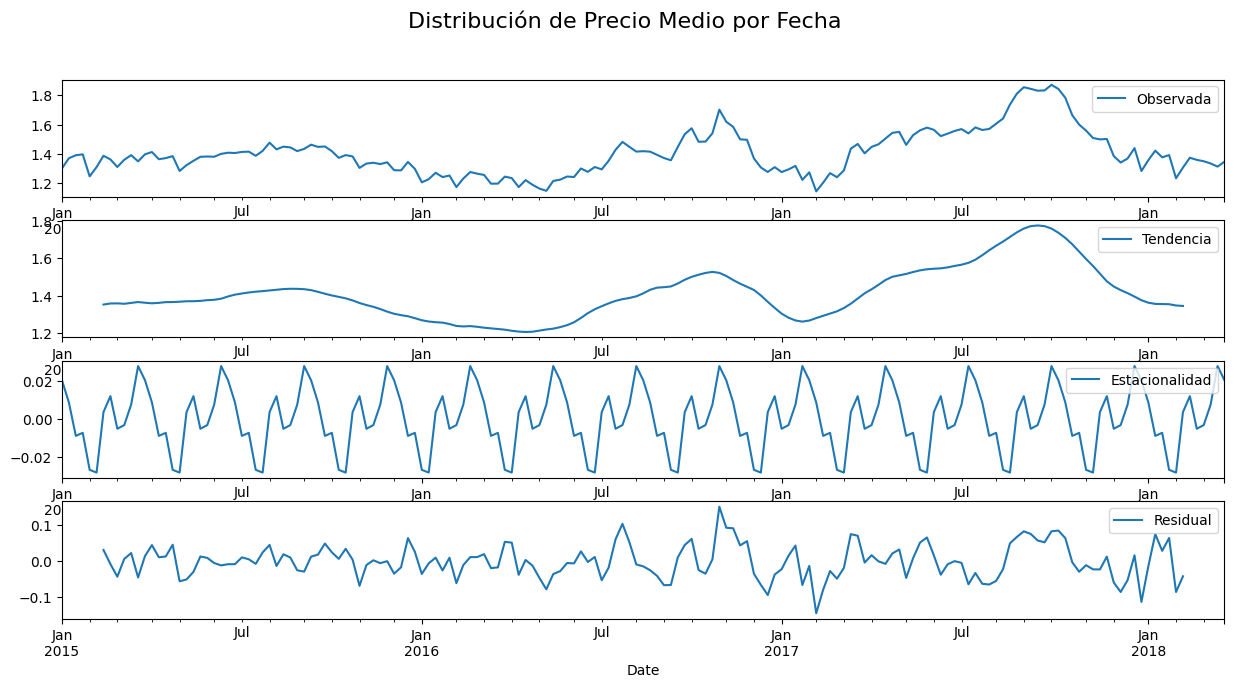

In [4]:
# Formatear fecha en DateTime
avocado["Date"] = pd.to_datetime(avocado["Date"])

#     - Agrupa los datos por `Date` y calcula el promedio de `AveragePrice` utilizando `groupby()` si es necesario.

monthly_mean = avocado.groupby(avocado.Date)["AveragePrice"].mean()

#     - Visualiza los componentes descompuestos usando `matplotlib` para cada uno de ellos.

global_mean = avocado[["AveragePrice"]].mean().iloc[0]
print("Media de precio mensual de aguacates: ",global_mean)

decompose = sm.tsa.seasonal_decompose(monthly_mean, model="additive", period=12)

fig, axes = plt.subplots(4, 1, figsize=(15, 7))

fig.suptitle('Distribución de Precio Medio por Fecha', fontsize=16)
decompose.observed.plot(ax=axes[0], legend=True, label="Observada")
decompose.trend.plot(ax=axes[1 ], legend=True, label="Tendencia")
decompose.seasonal.plot(ax=axes[2], legend=True, label="Estacionalidad")
decompose.resid.plot(ax=axes[3], legend=True, label="Residual")

plt.show()


2. **Análisis de Estacionalidad por Región:** 
   - **Uso de Datos:** Usa las columnas `AveragePrice`, `Date` y `Total Volume`.
   - **Esperado:** Utiliza gráficos de líneas para visualizar cómo varían los precios de aguacates por región a lo largo de diferentes estaciones del año.
     - Agrupa los datos por `region` y `Date` utilizando `groupby()`.
     - Calcula el promedio de `AveragePrice` para cada región.
     - Representa gráficamente las tendencias utilizando `plt.plot()` de `matplotlib`.


In [5]:
# BREY


3. **Comparación de Precios Promedio Mensuales:**
   - **Uso de Datos:** Usa las columnas `AveragePrice` y `Date`.
   - **Esperado:** Calcula y compara los precios promedio mensuales.
     - Agrupa los datos por mes usando `pd.Grouper` con `freq='M'`.
     - Calcula el promedio de `AveragePrice` para cada mes con `mean()`.
     - Visualiza los resultados con un gráfico de líneas usando `plt.plot()`.


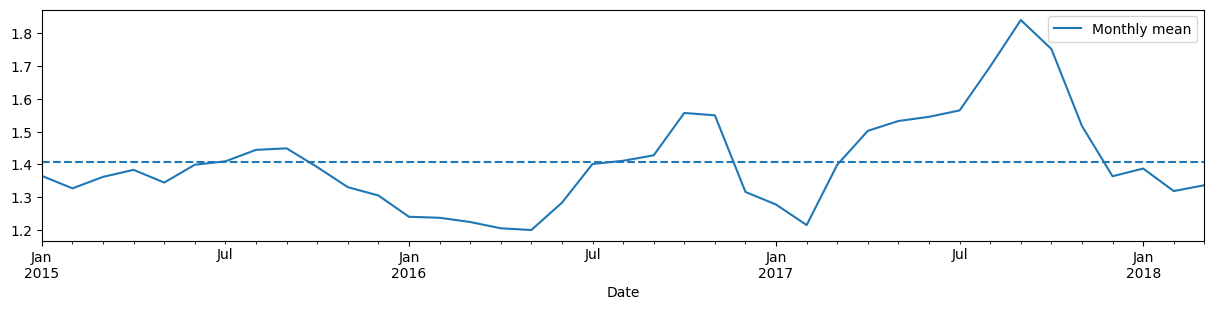

In [6]:
AveragePrice_monthly = avocado.groupby(avocado.Date.dt.to_period("M"))["AveragePrice"]
plt.figure(figsize=(15, 3))
AveragePrice_monthly.mean().plot(legend=True, label="Monthly mean")
plt.axhline(global_mean, linestyle='--', label="Media global")
plt.show()



4. **Tendencia de Ventas a lo Largo del Tiempo:**
   - **Uso de Datos:** Usa las columnas `Total Volume` y `Date`.
   - **Esperado:** Analiza cómo varía el volumen total de ventas a lo largo del tiempo.
     - Agrupa los datos por `Date` y suma el `Total Volume` usando `groupby()`.
     - Visualiza los resultados usando un gráfico de líneas con `plt.plot()` para mostrar la tendencia.



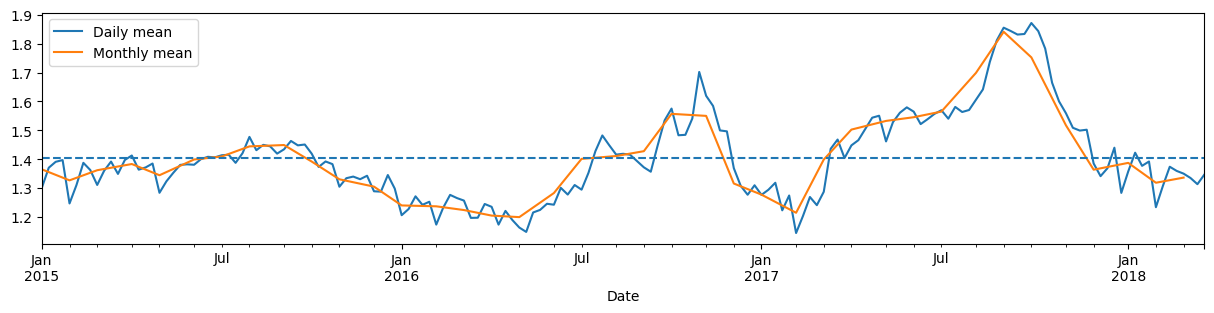

In [7]:
averagePrice_bydate = avocado.groupby(avocado.Date)["AveragePrice"]
global_mean = avocado[["AveragePrice"]].mean().iloc[0]
plt.figure(figsize=(15, 3))
averagePrice_bydate.mean().plot(legend=True, label="Daily mean")
AveragePrice_monthly.mean().plot(legend=True, label="Monthly mean")
plt.axhline(global_mean, linestyle='--', label="Global mean")
plt.show()


5. **Análisis de Cambios en Precios Anuales:**
   - **Uso de Datos:** Usa las columnas `AveragePrice` y `year`.
   - **Esperado:** Observa las diferencias anuales en los precios promedio.
     - Agrupa los datos por `year` utilizando `groupby()`.
     - Calcula el promedio de `AveragePrice` para cada año.
     - Representa los resultados en un gráfico de barras usando `plt.bar()` que compare los precios de cada año.



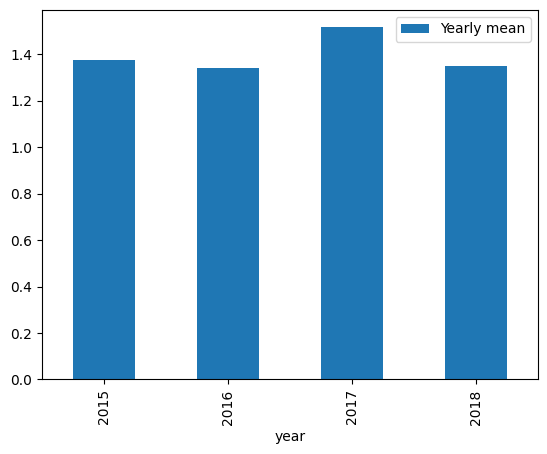

In [8]:
AveragePrice_yearly = avocado.groupby(avocado.year)["AveragePrice"]
AveragePrice_yearly.mean().plot(legend=True, label="Yearly mean", kind="bar")
plt.show()

### 2. **Gráficos para Visualización de Datos**
**Resumen:** La visualización de datos es clave para identificar patrones y relaciones entre diferentes variables. Los gráficos apropiados pueden proporcionar información valiosa sobre el comportamiento de los precios y volúmenes de ventas.

1. **Gráfico de Violín de Volumen de Ventas por Región:**
   - **Uso de Datos:** Usa las columnas `Total Volume` y `region`.
   - **Esperado:** Visualiza la distribución de ventas en diferentes regiones.
     - Utiliza la función `violinplot` de `seaborn` para crear gráficos de violín.
     - Configura los ejes para mostrar la relación entre `Total Volume` y `region`.
     - Añade etiquetas y títulos usando `plt.title()` y `plt.xlabel()` para facilitar la interpretación.



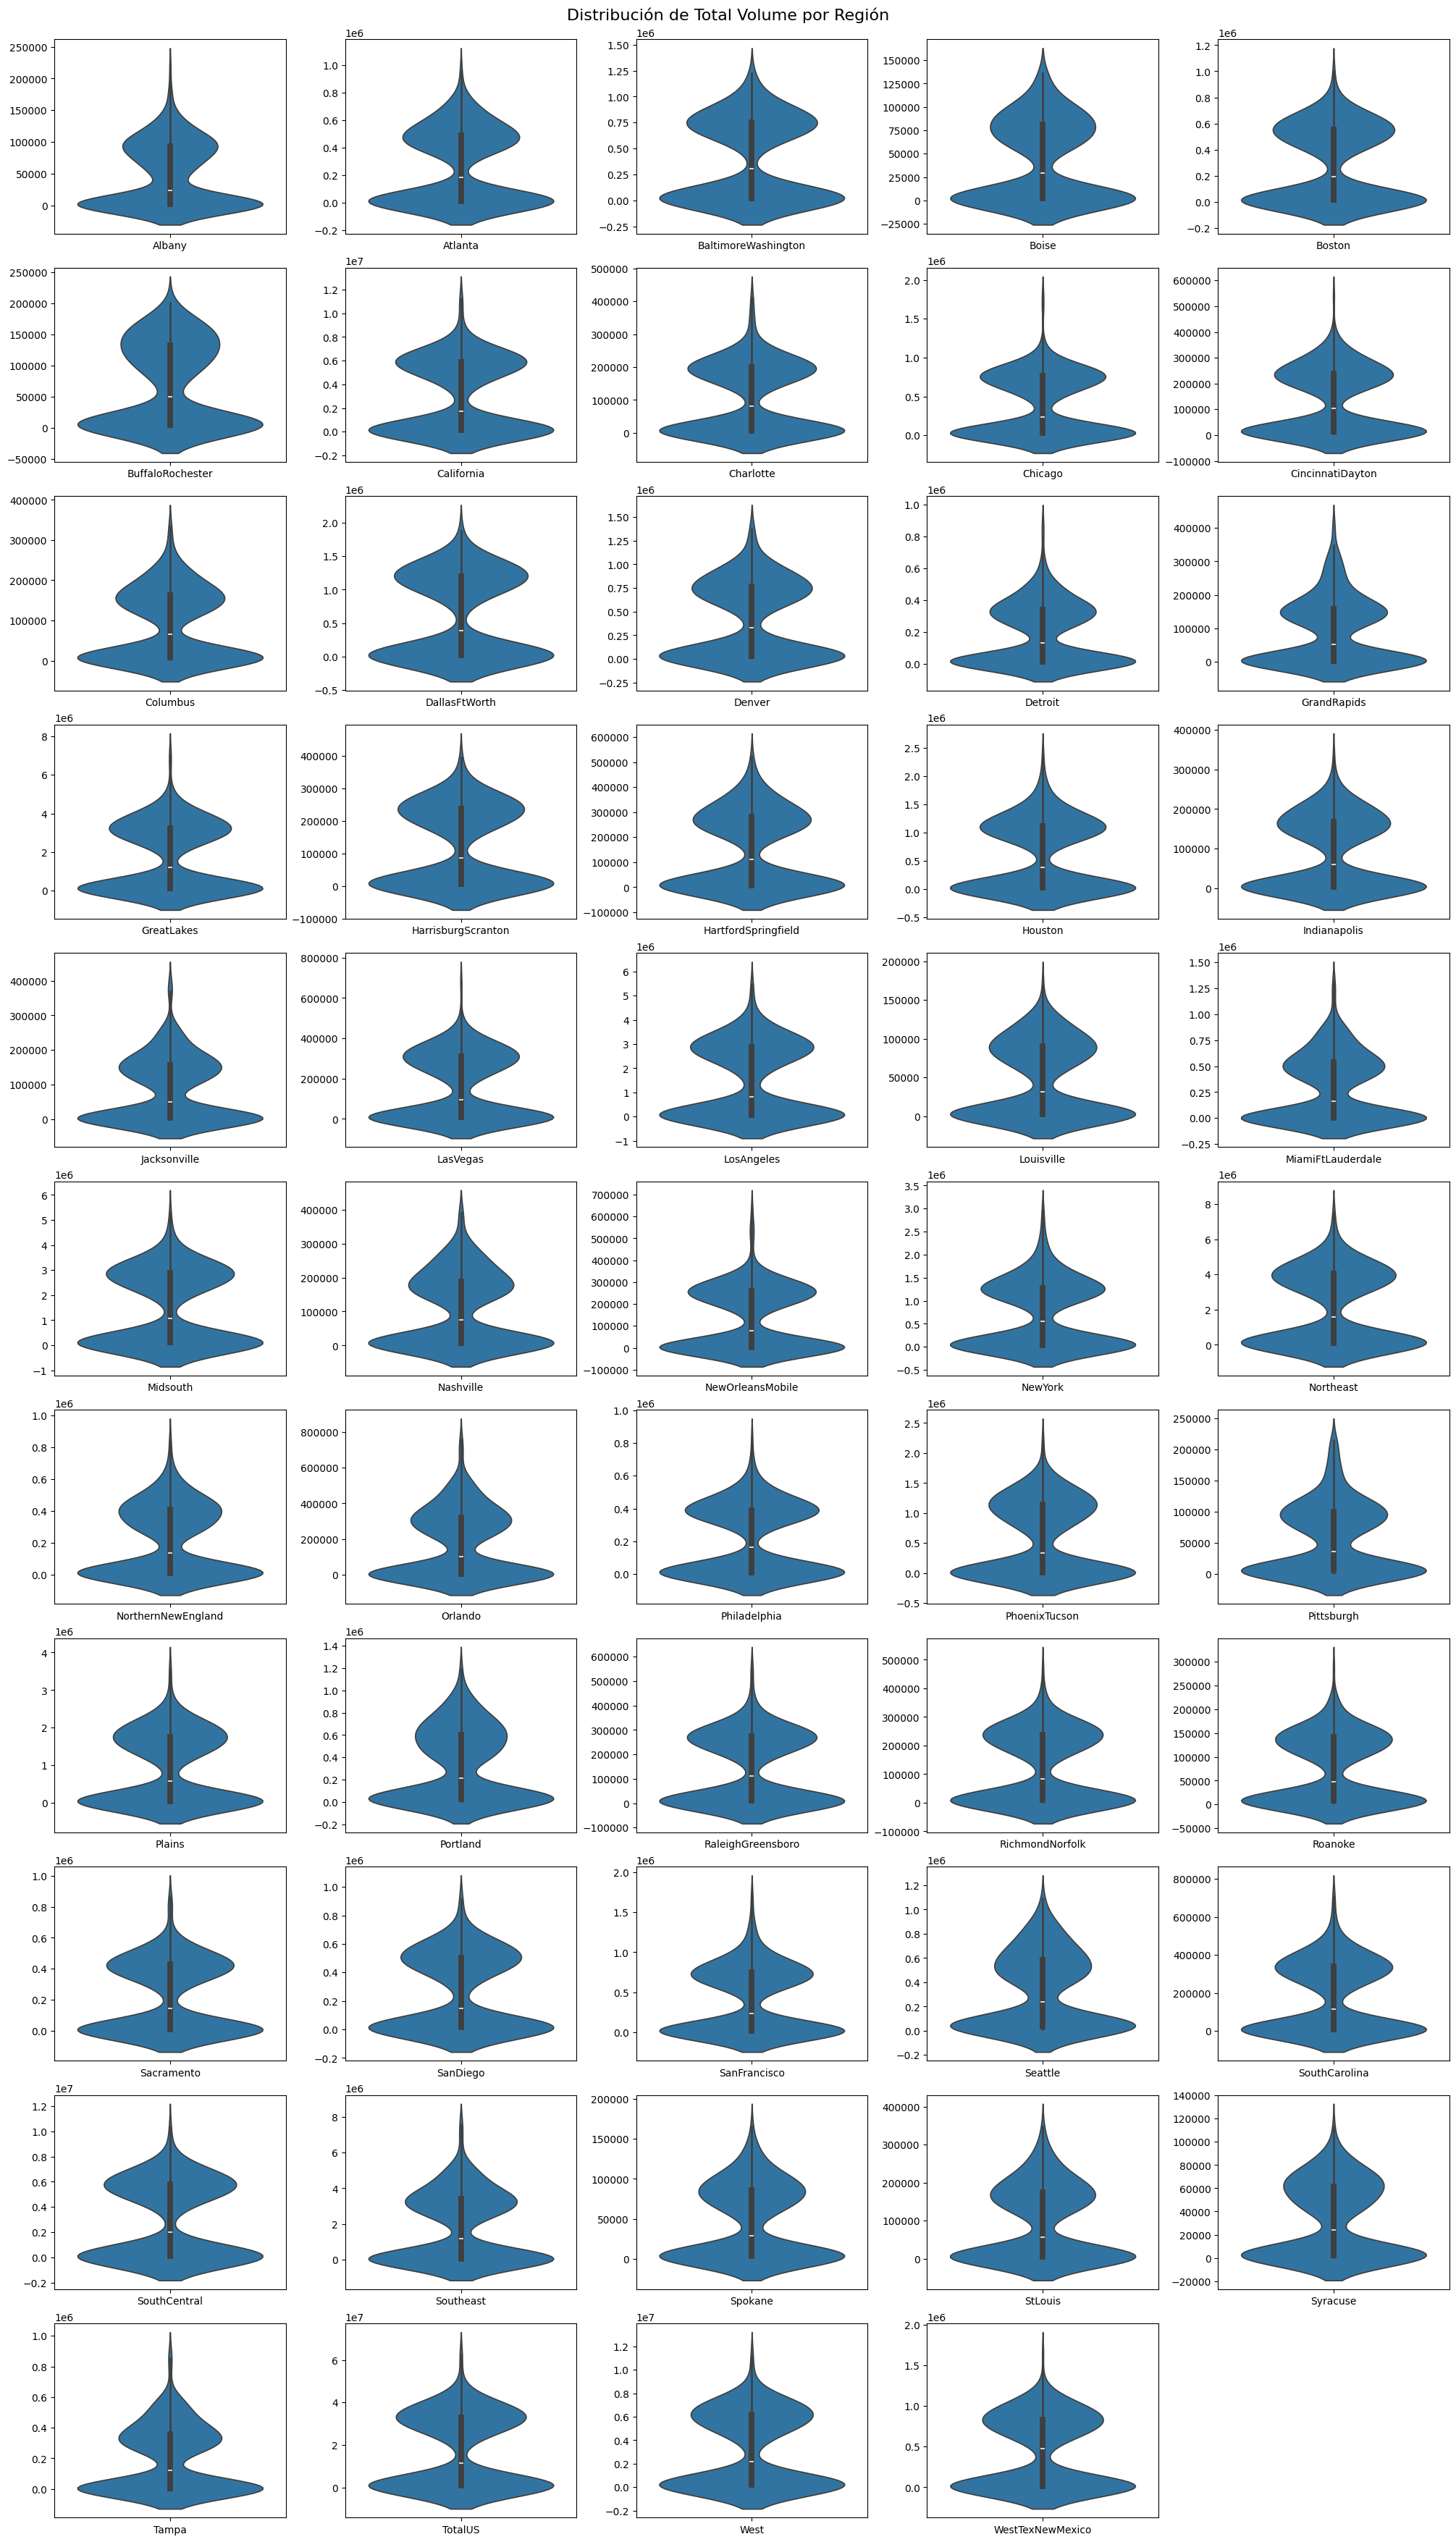

In [9]:
regions = avocado["region"].unique()

# Definir el número de filas y columnas para la cuadrícula
n_cols = 5  # número de columnas
n_rows = int(np.ceil(len(regions) / n_cols))  # calcular el número de filas

# Crear una figura grande para contener todos los subplots
fig, axes = plt.subplots(n_rows, n_cols, figsize=(20, 35), constrained_layout=True)

# Aplanar el array de ejes para poder iterar fácilmente
axes = axes.flatten()
# Crear un gráfico por cada región
for i, region in enumerate(regions):
    # Filtrar los datos por región
    region_data = avocado[avocado['region'] == region]
    
    # Crear el violinplot para la región
    sns.violinplot(x=region_data['region'], y=region_data['Total Volume'], ax=axes[i], density_norm="width")
    
    # Establecer el título del gráfico como el nombre de la región
    # axes[i].set_title(region)
    axes[i].set(xlabel=None, ylabel=None)
    # Rotar etiquetas del eje X si es necesario (aunque solo hay una por gráfico)
    # axes[i].tick_params(axis='x', rotation=90)

# Eliminar cualquier gráfico vacío si hay más subplots que regiones
for j in range(i+1, len(axes)):
    fig.delaxes(axes[j])

# Mostrar la gráfica

fig.suptitle('Distribución de Total Volume por Región', fontsize=16)
plt.show()


2. **Boxplot Comparativo de Precios entre Años:**
   - **Uso de Datos:** Usa las columnas `AveragePrice` y `year`.
   - **Esperado:** Genera boxplots para comparar la distribución de precios.
     - Utiliza `boxplot` de `seaborn` para crear boxplots que comparen `AveragePrice` entre diferentes años.
     - Asegúrate de que cada boxplot represente un año diferente.
     - Incluye etiquetas y títulos descriptivos usando `plt.title()`.



3. **Histograma de Volumen Total de Ventas:**
   - **Uso de Datos:** Usa la columna `Total Volume`.
   - **Esperado:** Crea un histograma para mostrar la distribución del volumen total de ventas.
     - Utiliza `hist()` de `matplotlib` para crear el histograma.
     - Ajusta el número de bins para una visualización clara usando el parámetro `bins`.
     - Añade etiquetas y un título que describa lo que se muestra.



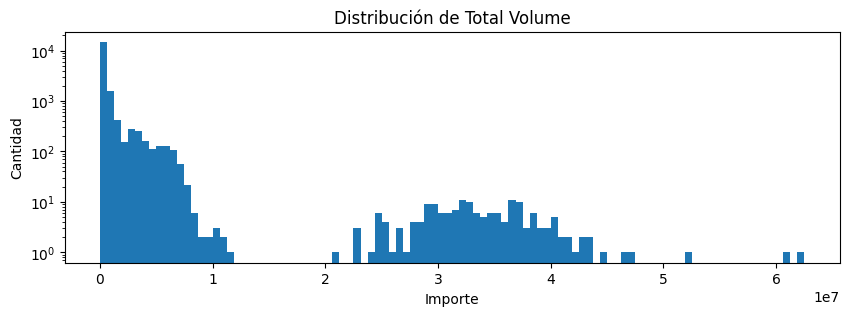

In [10]:
plt.figure(figsize=(10, 3))
plt.title("Distribución de Total Volume")
plt.xlabel("Importe")
plt.ylabel("Cantidad")
plt.hist(avocado["Total Volume"], bins=100, log=True)
plt.show()

4. **Gráfico de Barras de Ventas por Tipo de Bolsa:**
   - **Uso de Datos:** Utiliza las columnas `Total Bags`, `Small Bags`, `Large Bags` y `XLarge Bags`.
   - **Esperado:** Compara las ventas de diferentes tipos de bolsas.
     - Suma los volúmenes de ventas por tipo de bolsa utilizando `sum()`.
     - Crea un gráfico de barras con `plt.bar()` para mostrar las diferencias en ventas.
     - Asegúrate de incluir etiquetas para cada tipo de bolsa.



5. **Gráfico de Líneas de Precios Promedios por Año:**
   - **Uso de Datos:** Utiliza las columnas `AveragePrice` y `year`.
   - **Esperado:** Visualiza la tendencia de precios promedio a lo largo de los años.
     - Agrupa los datos por `year` y calcula el promedio de `AveragePrice`.
     - Usa `plt.plot()` para crear un gráfico de líneas que muestre la evolución de precios.
     - Añade un título y etiquetas descriptivas a los ejes usando `plt.title()` y `plt.xlabel()`.



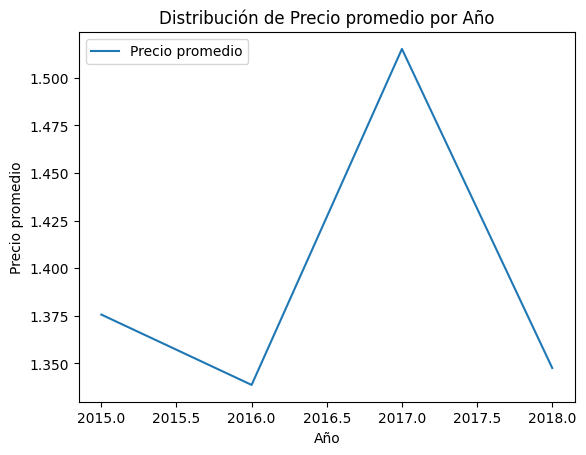

In [11]:
AveragePrice_yearly.mean().plot(legend=True, label="Precio promedio")
plt.title("Distribución de Precio promedio por Año")
plt.xlabel("Año")
plt.ylabel("Precio promedio")
plt.show()


### 3. **Elasticidad del Precio**
**Resumen:** El análisis de elasticidad precio-demanda permite evaluar cómo los cambios en los precios afectan la demanda de aguacates. Comprender la elasticidad puede ayudar a formular estrategias de precios más efectivas.

La fórmula de elasticidad precio-demanda es:

$$
E_d = \frac{\% \text{Cambio en la cantidad demandada}}{\% \text{Cambio en el precio}} = \frac{\Delta Q / Q}{\Delta P / P}
$$

1. **Elasticidad Precio-Demanda por Año:**
   - **Uso de Datos:** Usa las columnas `AveragePrice` y `Total Volume`.
   - **Esperado:** Calcula la elasticidad del precio de la demanda para cada año.
     - Calcula la variación porcentual de `Total Volume` y `AveragePrice` utilizando `pd.pct_change()`.
     - Utiliza la fórmula de elasticidad para determinar la sensibilidad de la demanda respecto al precio.
     - Presenta los resultados en un gráfico de líneas usando `plt.plot()` para mostrar la elasticidad por año.




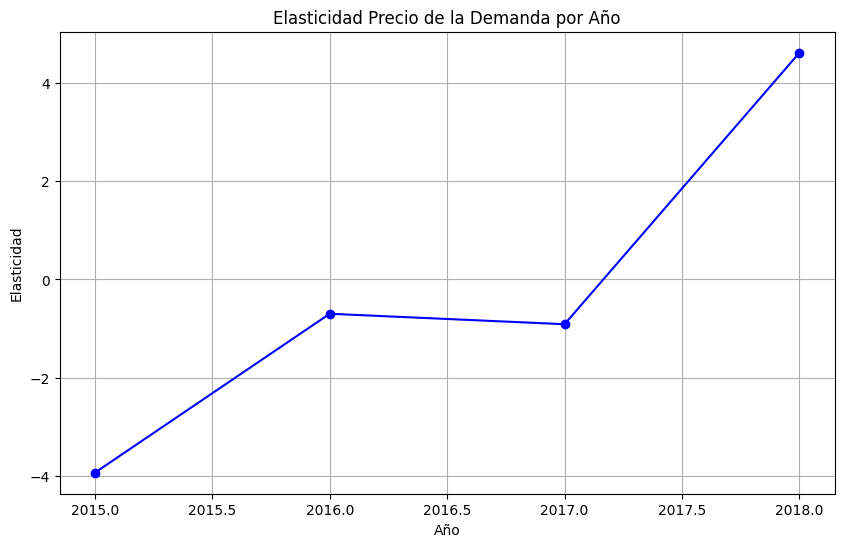

In [12]:
# Calcular la variación porcentual para Total Volume y AveragePrice
avocado['Volume Change (%)'] = avocado['Total Volume'].pct_change()
avocado['Price Change (%)'] = avocado['AveragePrice'].pct_change()

# Calcular la elasticidad del precio de la demanda
avocado['Elasticity'] = avocado['Volume Change (%)'] / avocado['Price Change (%)']

# Limpieza de datos inf , -inf  y NaN
avocado['Elasticity'] = avocado['Elasticity'].replace([float('inf'), float('-inf')], pd.NA).dropna()


# Agrupar por año y calcular la elasticidad promedio por año
avocado_elasticity_by_year = avocado.groupby('year')['Elasticity'].mean().reset_index()

# Graficar la elasticidad por año
plt.figure(figsize=(10, 6))
plt.plot(avocado_elasticity_by_year['year'], avocado_elasticity_by_year['Elasticity'], marker='o', linestyle='-', color='b')
plt.title('Elasticidad Precio de la Demanda por Año')
plt.xlabel('Año')
plt.ylabel('Elasticidad')
plt.grid(True)
plt.show()


2. **Comparación de Elasticidad en Diferentes Mercados:**
   - **Uso de Datos:** Utiliza las columnas `Total Volume` y `AveragePrice`.
   - **Esperado:** Calcula la elasticidad del precio de la demanda en diferentes regiones.
     - Agrupa los datos por `region` y calcula la elasticidad para cada región utilizando `pd.pct_change()`.
     - Presenta un gráfico de barras que muestre la elasticidad por región usando `plt.bar()`.



3. **Elasticidad a Nivel de Tipo de Bolsa:**
   - **Uso de Datos:** Usa las columnas `AveragePrice` y `Total Bags`.
   - **Esperado:** Calcula la elasticidad del precio de la demanda específica para cada tipo de bolsa.
     - Suma los volúmenes de ventas por tipo de bolsa utilizando `groupby()` y `sum()`.
     - Calcula la elasticidad para cada tipo y presenta los resultados en un gráfico comparativo usando `plt.bar()`.




Para una mejor interpretación del contenido de las columnas, se han renombrado según la documentación


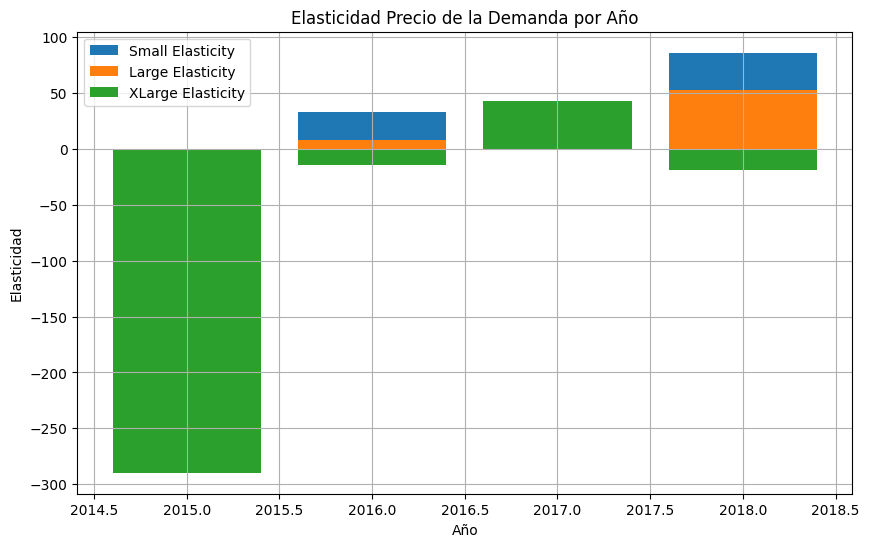

In [52]:


print("Para una mejor interpretación del contenido de las columnas, se han renombrado según la documentación")
avocado.rename(columns={'4046': 'Small Volume', '4225': 'Large Volume', '4770': 'XLarge Volume'}, inplace=True)

avocado['Small Volume Change (%)'] = avocado['Small Volume'].pct_change()
avocado['Large Volume Change (%)'] = avocado['Large Volume'].pct_change()
avocado['XLarge Volume Change (%)'] = avocado['XLarge Volume'].pct_change()

# Calcular la elasticidad del precio de la demanda
avocado['Small Elasticity'] = avocado['Small Volume Change (%)'] / avocado['Price Change (%)']
avocado['Large Elasticity'] = avocado['Large Volume Change (%)'] / avocado['Price Change (%)']
avocado['XLarge Elasticity'] = avocado['XLarge Volume Change (%)'] / avocado['Price Change (%)']

# Limpieza de datos inf , -inf  y NaN
avocado['Small Elasticity'] = avocado['Small Elasticity'].replace([float('inf'), float('-inf')], pd.NA).dropna()
avocado['Large Elasticity'] = avocado['Large Elasticity'].replace([float('inf'), float('-inf')], pd.NA).dropna()
avocado['XLarge Elasticity'] = avocado['XLarge Elasticity'].replace([float('inf'), float('-inf')], pd.NA).dropna()


# Agrupar por año y calcular la elasticidad promedio por año
avocado_Smallelasticity_by_year = avocado.groupby('year')['Small Elasticity'].mean().reset_index()
avocado_Largeelasticity_by_year = avocado.groupby('year')['Large Elasticity'].mean().reset_index()
avocado_XLargeelasticity_by_year = avocado.groupby('year')['XLarge Elasticity'].mean().reset_index()

# Graficar la elasticidad por año
plt.figure(figsize=(10, 6))
plt.bar(avocado_Smallelasticity_by_year['year'], avocado_Smallelasticity_by_year['Small Elasticity'], label='Small Elasticity')
plt.bar(avocado_Largeelasticity_by_year['year'], avocado_Largeelasticity_by_year['Large Elasticity'], label='Large Elasticity')
plt.bar(avocado_XLargeelasticity_by_year['year'], avocado_XLargeelasticity_by_year['XLarge Elasticity'], label='XLarge Elasticity')
plt.title('Elasticidad Precio de la Demanda por Año')
plt.xlabel('Año')
plt.ylabel('Elasticidad')
plt.grid(True)
plt.legend()
plt.show()


4. **Análisis de Elasticidad Comparativa entre Orgánicos y Convencionales:**
   - **Uso de Datos:** Usa las columnas `AveragePrice`, `Total Volume` y `type`.
   - **Esperado:** Compara la elasticidad de la demanda entre aguacates orgánicos y convencionales.
     - Agrupa los datos por `type` y calcula la elasticidad utilizando `pd.pct_change()`.
     - Presenta un gráfico que muestre la diferencia en elasticidad entre los dos tipos usando `plt.bar()`.




5. **Análisis de la Elasticidad Precios-Ventas:**
   - **Uso de Datos:** Usa las columnas `AveragePrice` y `Total Volume`.
   - **Esperado:** Examina cómo las variaciones en `AveragePrice` afectan a `Total Volume`.
     - Realiza un análisis de la relación entre estas dos variables calculando la elasticidad.
     - Presenta un gráfico de dispersión que muestre la relación y discute la tendencia observada utilizando `plt.scatter()` y `plt.plot()`.



### 4. **Análisis de Cohortes**
**Resumen:** El análisis de cohortes permite agrupar datos según características específicas y observar cómo se comportan a lo largo del tiempo. Se centra en cohortes de precios y ventas para entender las dinámicas del mercado.

1. **Cohortes Basadas en Precios Promedios Trimestrales:**
   - **Uso de Datos:** Usa las columnas `AveragePrice`, `Total Volume` y `Date`.
   - **Esperado:** Crea cohortes trimestrales y analiza cambios en precios y volúmenes.
     - Agrupa los datos por trimestre usando `pd.Grouper` con `freq='Q'`.
     - Calcula el promedio de `AveragePrice` y suma `Total Volume` para cada cohorte.
     - Visualiza los resultados en un gráfico de líneas que muestre la evolución de las cohortes.



2. **Cohortes por Región y Fecha:**
   - **Uso de Datos:** Utiliza las columnas `AveragePrice`, `Total Volume`, `region` y `Date`.
   - **Esperado:** Analiza cómo varían las cohortes de diferentes regiones.
     - Agrupa los datos por `region` y `Date` usando `groupby()`.
     - Calcula el promedio de precios y volumen para cada cohorte.
     - Presenta los resultados en gráficos de barras que muestren comparaciones entre regiones.



3. **Análisis de Cohortes en Función del Tipo de Bolsa:**
   - **Uso de Datos:** Usa las columnas `Total Bags`, `Small Bags`, `Large Bags`, `XLarge Bags` y `Date`.
   - **Esperado:** Examina cómo se comportan las diferentes cohortes según el tipo de bolsa.
     - Agrupa los datos por tipo de bolsa y `Date`.
     - Calcula el volumen de ventas total y muestra los resultados en un gráfico de líneas.



4. **Cohortes de Clientes Basadas en Ventas:**
   - **Uso de Datos:** Usa las columnas `Total Volume`, `Date` y `region`.
   - **Esperado:** Analiza el comportamiento de las cohortes según el volumen de ventas.
     - Clasifica los clientes según su volumen de compras.
     - Visualiza las cohortes en gráficos de líneas o barras que muestren el comportamiento de compra a lo largo del tiempo.



5. **Evaluación de Retención de Ventas por Cohorte:**
   - **Uso de Datos:** Usa las columnas `Total Volume` y `Date`.
   - **Esperado:** Estudia cómo se retienen las ventas en cohortes a lo largo de un año.
     - Agrupa los datos por mes y cohortes.
     - Calcula la retención de ventas y visualiza los resultados en un gráfico de líneas que muestre las tasas de retención.




### 5. **Análisis de Correlación y Regresión**
**Resumen:** Se centra en la identificación de relaciones significativas entre las variables numéricas y el desarrollo de modelos de regresión para hacer predicciones basadas en esas relaciones.

1. **Matriz de Correlación:** 
   - **Uso de Datos:** Utiliza las columnas numéricas del DataFrame (p. ej., `AveragePrice`, `Total Volume`, `4046`, `4225`, `4770`, `Total Bags`).
   - **Esperado:** 
     - Importa las librerías necesarias: `import seaborn as sns` y `import matplotlib.pyplot as plt`.
     - Calcula la matriz de correlación usando el método `.corr()` del DataFrame.
     - Visualiza la matriz utilizando `sns.heatmap()`. 
     - Anota las correlaciones más significativas y discute su posible impacto en el análisis.



Se observa una alta correlación entre 'Total Volume' y ('Small Volume', 'Large Volume','XLarge Volume') lo que podría indicar que las tres son una segmentación de Total Volume


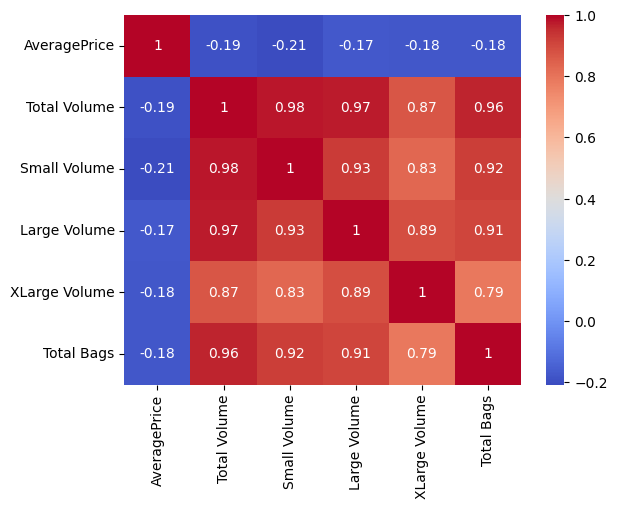

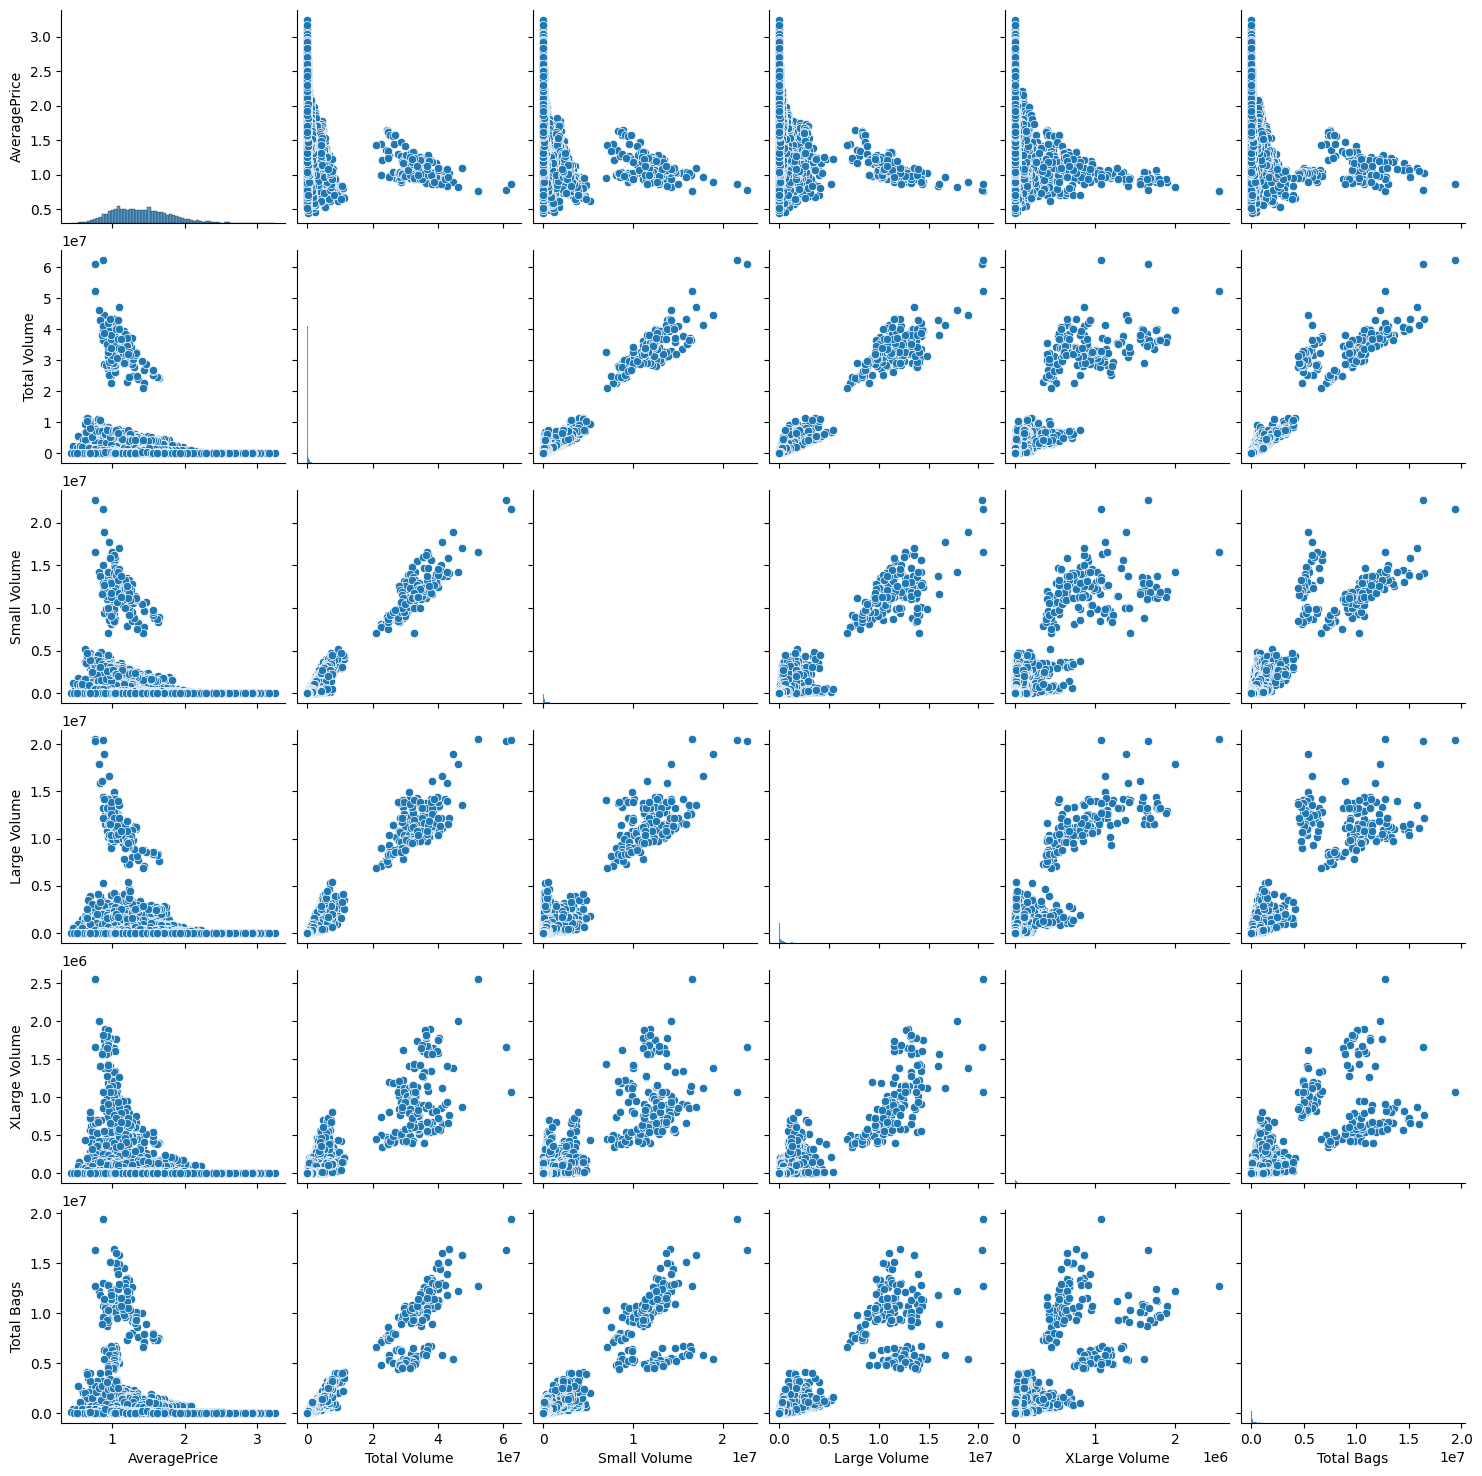

In [51]:
print("Se observa una alta correlación entre 'Total Volume' y ('Small Volume', 'Large Volume','XLarge Volume') lo que podría indicar (erroneamente) que las tres son una segmentación de Total Volume")

totalVol = avocado[['Total Volume']].sum().values[0]
smallVol = avocado[['Small Volume']].sum().values[0]
largeVol = avocado[['Large Volume']].sum().values[0]
xlargeVol = avocado[['XLarge Volume']].sum().values[0]

suma = smallVol + largeVol + xlargeVol
diff = totalVol - suma

print(f"Total Volume: ${totalVol} NO es la Suma de Small Volume, Large Volume y XLarge Volume: ${suma} diferencia: ${diff}")
avocado_volumes = avocado[['AveragePrice', 'Total Volume', 'Small Volume', 'Large Volume','XLarge Volume', 'Total Bags']]

sns.heatmap(avocado_volumes.corr(), cmap='coolwarm', annot=True)
plt.show()

print("En el pair plot se observan cluesteres en la distribución entre las BAGS y el TOTALVOL")

sns.pairplot(avocado_volumes)
plt.show()


Total Volume:  15523402593.400002 Suma de Small Volume, Large Volume y XLarge Volume:  11150188799.32 diferencia:  4373213794.080002


2. **Análisis de Dispersión entre Variables Clave:** 
   - **Uso de Datos:** Selecciona variables numéricas de interés como `AveragePrice` y `Total Volume`.
   - **Esperado:** 
     - Importa las librerías necesarias: `import seaborn as sns` y `import matplotlib.pyplot as plt`.
     - Crea un gráfico de dispersión con `sns.scatterplot()` para visualizar la relación entre `AveragePrice` y `Total Volume`.
     - Añade una línea de regresión utilizando `sns.regplot()` para ilustrar las tendencias.
     - Compara el ajuste de una regresión lineal frente a una polinómica.



3. **Predicciones Mensuales Usando Datos Trimestrales:**
   - **Uso de Datos:** Agrupa datos por trimestres y segmenta en meses utilizando `Date`, `AveragePrice`, y `Total Volume`.
   - **Esperado:** 
     - Convierte la columna `Date` a tipo datetime si es necesario.
     - Agrupa los datos por trimestre y calcula el promedio de `AveragePrice` y `Total Volume`.
     - Utiliza los datos de los primeros 2 meses de un trimestre para predecir el precio del tercer mes.
     - Compara los resultados de las predicciones con los precios reales.
     - Evalúa la precisión de tus predicciones utilizando métricas como R² y RMSE.



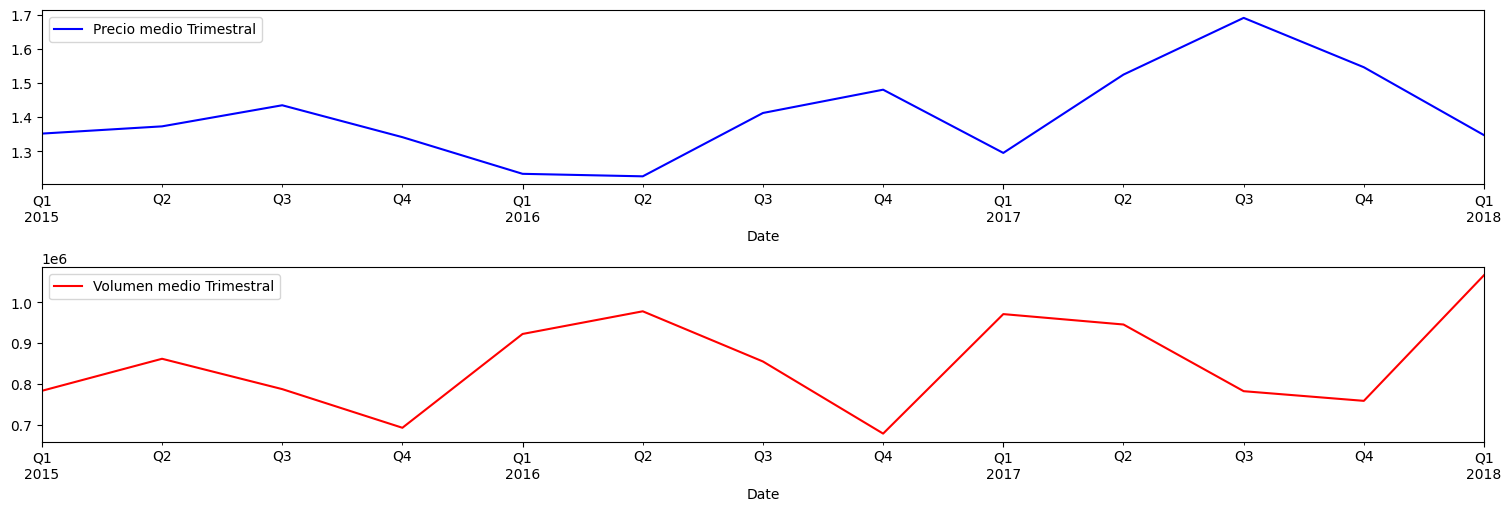

Date
2015Q1    1.352144
2015Q2    1.373348
Freq: Q-DEC, Name: AveragePrice, dtype: float64

In [70]:
fig, axes = plt.subplots(2, 1, figsize=(15, 5), constrained_layout=True)
avocado.groupby(avocado.Date.dt.to_period("Q"))["AveragePrice"].mean().plot(legend=True, label="Precio medio Trimestral", ax=axes[0], color='blue')
avocado.groupby(avocado.Date.dt.to_period("Q"))["Total Volume"].mean().plot(legend=True, label="Volumen medio Trimestral", ax=axes[1], color='red')
plt.show()

avocado.groupby(avocado.Date.dt.to_period("Q"))["AveragePrice"].mean().head(2)


4. **Predicciones Trimestrales:**
   - **Uso de Datos:** Agrupa los datos en trimestres usando solo variables numéricas.
   - **Esperado:** 
     - Agrupa los datos por trimestres usando `pd.Grouper()` con `freq='Q'` para obtener promedios.
     - Usa los datos de 1 o 2 trimestres anteriores para predecir el siguiente trimestre ajustando modelos de regresión lineal y polinómica.
     - Compara los resultados de las predicciones con los precios reales.
     - Evalúa la precisión de tus predicciones utilizando métricas como R² y RMSE.



5. **Predicciones Anuales:**
   - **Uso de Datos:** Agrupa los datos en años, utilizando únicamente columnas numéricas.
   - **Esperado:** 
     - Agrupa los datos por año utilizando `pd.Grouper()` con `freq='Y'`.
     - Usa los datos de 1 o 2 años anteriores para predecir el siguiente año ajustando modelos de regresión lineal y polinómica.
     - Evalúa la precisión de tus predicciones utilizando métricas como R² y RMSE.



6. **Desarrollo de Modelos de Regresión Múltiple:** 
   - **Uso de Datos:** Selecciona varias variables numéricas como `Total Volume`, `4046`, `4225`, `4770`, y `Total Bags` para predecir `AveragePrice`.
   - **Esperado:** 
     - Define las variables independientes (X) y dependientes (y).
     - Ajusta modelos de regresión múltiple.
     - Compara su rendimiento utilizando métricas como R² y RMSE y discute las implicaciones de los resultados.



7. **Análisis de Coeficientes de Regresión Múltiple:**
   - **Uso de Datos:** Examina los coeficientes de los modelos de regresión múltiple ajustados.
   - **Esperado:** 
     - Extrae los coeficientes del modelo ajustado.
     - Interpreta los coeficientes para entender el impacto de cada variable numérica en `AveragePrice`.
     - Comenta sobre las variables más significativas y su relevancia.



8. **Modelos de Regresión para Diferenciar Volúmenes de Ventas:**
   - **Uso de Datos:** Usa `AveragePrice`, `Total Volume`, `4046`, `4225`, y `4770`.
   - **Esperado:** 
     - Ajusta modelos de regresión para analizar cómo los diferentes volúmenes de ventas afectan `AveragePrice`.
     - Compara los resultados de regresión lineal y polinómica.
     - Presenta las conclusiones de tus análisis.



9. **Análisis de la Influencia de las Ventas Totales en el Precio Promedio:**
   - **Uso de Datos:** Usa `Total Volume`, `AveragePrice`, y `Total Bags`.
   - **Esperado:** 
     - Ajusta un modelo de regresión lineal y polinómica para ver cómo varía `AveragePrice` en función del volumen total de ventas.
     - Evalúa la significancia de los coeficientes y discute su relevancia.



10. **Regresión para Predecir el Precio Promedio Según el Volumen de Aguacates por Tipo:**
    - **Uso de Datos:** Usa `AveragePrice`, `4046`, `4225`, `4770`, y `Total Volume`.
    - **Esperado:** 
      - Ajusta modelos de regresión lineal y polinómica.
      - Evalúa la efectividad de ambos modelos utilizando métricas como R² y RMSE.
      - Discute cuál modelo ofrece mejores predicciones y por qué, basándote en los resultados obtenidos.


